### Importing Libraries


In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score,precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

### Data collection

In [116]:
datapath = r"C:\Users\USER\3d-printing-model\dataset\dataset.csv"
DataFrame= pd.read_csv(datapath)

In [117]:
print("DataFrame loaded successfully.")
DataFrame=pd.DataFrame(DataFrame)
DataFrame

DataFrame loaded successfully.


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.06,9.0,10,honeycomb,200,75,80,abs,75,200,9,0.9
62,0.04,2.0,80,grid,230,70,40,abs,50,40,12,0.8
63,0.02,4.5,70,honeycomb,240,85,40,abs,75,68,10,0.8
64,0.05,6.0,10,honeycomb,245,75,85,abs,75,205,5,0.5


### Analyze the Data

In [118]:
#printing the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
first_five_rows = DataFrame.head(5)
first_five_rows_output = pd.DataFrame(first_five_rows.values, columns=first_five_rows.columns, index=first_five_rows.index)
print("="*170)
print(first_five_rows_output.to_string())
print("="*170)



First 5 rows of the DataFrame:
  layer_height wall_thickness infill_density infill_pattern nozzle_temperature bed_temperature print_speed material fan_speed roughness tension_strenght elongation
0         0.02            8.0             90           grid                220              60          40      abs         0        25               18        1.2
1         0.02            7.0             90      honeycomb                225              65          40      abs        25        32               16        1.4
2         0.02            1.0             80           grid                230              70          40      abs        50        40                8        0.8
3         0.02            4.0             70      honeycomb                240              75          40      abs        75        68               10        0.5
4         0.02            6.0             90           grid                250              80          40      abs       100        92              

In [119]:
#printing the last 5 rows of the DataFrame
print("Last 5 rows of the DataFrame:")
last_rows = DataFrame.tail(5)  
formatted_output = pd.DataFrame(last_rows.values,  columns=last_rows.columns, index=last_rows.index)
print("="*170)
print(formatted_output.to_string())
print("="*170)

Last 5 rows of the DataFrame:
   layer_height wall_thickness infill_density infill_pattern nozzle_temperature bed_temperature print_speed material fan_speed roughness tension_strenght elongation
61         0.06            9.0             10      honeycomb                200              75          80      abs        75       200                9        0.9
62         0.04            2.0             80           grid                230              70          40      abs        50        40               12        0.8
63         0.02            4.5             70      honeycomb                240              85          40      abs        75        68               10        0.8
64         0.05            6.0             10      honeycomb                245              75          85      abs        75       205                5        0.5
65         0.15            1.0             50           grid                220              60         120      abs         0       120         

In [120]:
#Shape of the DataFrame
print(f"The shape of the DataFrame is: {DataFrame.shape[1]} columns")
print(f"The shape of the DataFrame is: {DataFrame.shape[0]} rows")

The shape of the DataFrame is: 12 columns
The shape of the DataFrame is: 66 rows


In [121]:
#checking the info of the DataFrame
print("="*80)
print("DATAFRAME STRUCTURE OVERVIEW".center(80))
print("="*80)
info_str = DataFrame.info()
print(info_str)


                          DATAFRAME STRUCTURE OVERVIEW                          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   bed_temperature     66 non-null     int64  
 6   print_speed         66 non-null     int64  
 7   material            66 non-null     object 
 8   fan_speed           66 non-null     int64  
 9   roughness           66 non-null     int64  
 10  tension_strenght    66 non-null     int64  
 11  elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB
None


In [122]:
print("="*150)
print("STATISTICAL SUMMARY OF THE DATAFRAME".center(150))
print("="*150)
summary = DataFrame.describe()
summary

                                                         STATISTICAL SUMMARY OF THE DATAFRAME                                                         


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.098182,5.583333,54.727273,222.272727,70.378788,64.242424,48.530303,160.545455,19.757576,1.625000
std,0.062608,2.952943,27.545512,15.094110,8.651839,28.598580,35.834328,95.703899,9.202108,0.762498
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,21.000000,4.000000,0.400000
25%,0.052500,3.000000,40.000000,210.000000,65.000000,40.000000,25.000000,78.250000,12.000000,1.025000
50%,0.100000,6.000000,50.000000,220.000000,70.000000,60.000000,50.000000,149.500000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,60.000000,75.000000,220.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,100.000000,120.000000,100.000000,368.000000,38.000000,3.300000


### Data cleaning

In [123]:
## checking duplicate values
print("="*50)
print("DUPLICATE VALUES CHECK".center(50))
print("="*50)
duplicate_count = DataFrame.duplicated().sum()
print(f"Number of duplicate rows in the DataFrame: {duplicate_count}")

              DUPLICATE VALUES CHECK              
Number of duplicate rows in the DataFrame: 0


#### There are no duplicated rows present in the  DataFrame

In [124]:
# checking null values in the DataFrame
null_values = DataFrame.isnull().sum()
print("="*50)
print("Null values in each column".center(50))
print("="*50)
print(null_values)

            Null values in each column            
layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64


###### From the above code snipett we can say there are zero null values means no null values situated in DataFrame 

In [125]:
## unique values in each column
print("="*240)
print("Unique values in each column".center(190))
print("="*240)
for col in DataFrame.columns:
    print(f" {col} : {set(DataFrame[col])}")


                                                                                 Unique values in each column                                                                                 
 layer_height : {0.1, 0.06, 0.09, 0.15, 0.2, 0.03, 0.05, 0.04, 0.02}
 wall_thickness : {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 4.5, 12.0}
 infill_density : {100, 70, 40, 10, 12, 80, 50, 20, 85, 90, 60, 30, 95}
 infill_pattern : {'grid', 'honeycomb'}
 nozzle_temperature : {225, 230, 200, 205, 240, 210, 245, 215, 250, 220}
 bed_temperature : {65, 100, 70, 75, 80, 85, 60, 95}
 print_speed : {65, 70, 40, 80, 85, 120, 60}
 material : {'abs', 'pla'}
 fan_speed : {0, 100, 75, 50, 25, 28}
 roughness : {128, 265, 138, 144, 145, 276, 21, 278, 24, 25, 154, 30, 32, 289, 163, 40, 168, 298, 172, 176, 180, 55, 312, 60, 192, 321, 68, 326, 200, 74, 75, 205, 212, 88, 220, 92, 225, 98, 357, 360, 368, 244, 118, 120, 121, 126}
 tension_strenght : {4, 5, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 21, 22, 23, 24, 

###### By checking the above values which are unique from each features, there is no inconsistent data in the DataFrame

In [126]:
##seperating categorical and numerical columns
categorical_cols = DataFrame.select_dtypes(include=['object']).columns
numerical_cols = DataFrame.select_dtypes(include=['number']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['infill_pattern', 'material']
Numerical columns: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strenght', 'elongation']


### EXploratory Data Analysis

#### Univariate Analysis

In [127]:
## printing the nuerical coilumns
for col in DataFrame.columns:
    print(f"{col}: {DataFrame[col].dtype}")

layer_height: float64
wall_thickness: float64
infill_density: int64
infill_pattern: object
nozzle_temperature: int64
bed_temperature: int64
print_speed: int64
material: object
fan_speed: int64
roughness: int64
tension_strenght: int64
elongation: float64


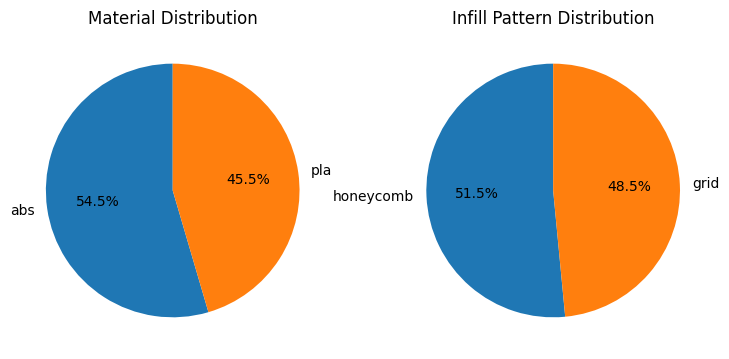

material
abs    36
pla    30
Name: count, dtype: int64

 infill_pattern
honeycomb    34
grid         32
Name: count, dtype: int64


In [128]:
#checking the count of values in material feature
fig, axes = plt.subplots(1, 2, figsize=(9, 8))
material_counts = DataFrame['material'].value_counts()
infill_values = DataFrame['infill_pattern'].value_counts()

axes[0].pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Material Distribution')
axes[1].pie(infill_values, labels=infill_values.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Infill Pattern Distribution')
plt.show()

print(DataFrame['material'].value_counts())
print('\n', DataFrame['infill_pattern'].value_counts())

##### 1. In Infill pattern Distribution both honeycomb and grid are equally disributed with 51 % and 49%.
##### 2. In material distribution both PLA(Polylactic Acid) and ABS(Acrylonitrile Butadiene Styrene) are distributed with 55 % and 45 %

In [129]:
for col in numerical_cols:
    data = pd.Series(DataFrame[col])
    print(f"Skewness of {col} is:",data.skew())

Skewness of layer_height is: 0.298948709756634
Skewness of wall_thickness is: 0.11453517583181035
Skewness of infill_density is: -0.16873137683968142
Skewness of nozzle_temperature is: 0.35410316387635715
Skewness of bed_temperature is: 0.8719320800643523
Skewness of print_speed is: 1.176906937520157
Skewness of fan_speed is: 0.01015320850049263
Skewness of roughness is: 0.4427161079235414
Skewness of tension_strenght is: 0.1940751115503373
Skewness of elongation is: 0.521891988456342


##### 1. bed_temperature, elongation and print_speed are right skeweed. Because these features are between skew values 0.5 to 1.
##### 2. According to right thumb rule if skewness is less than 0 then it is left skeweed.From features infill_density is left skeweed.
##### 3. Remaining all the features are symmetric because the values between 0.1 to 0.5.

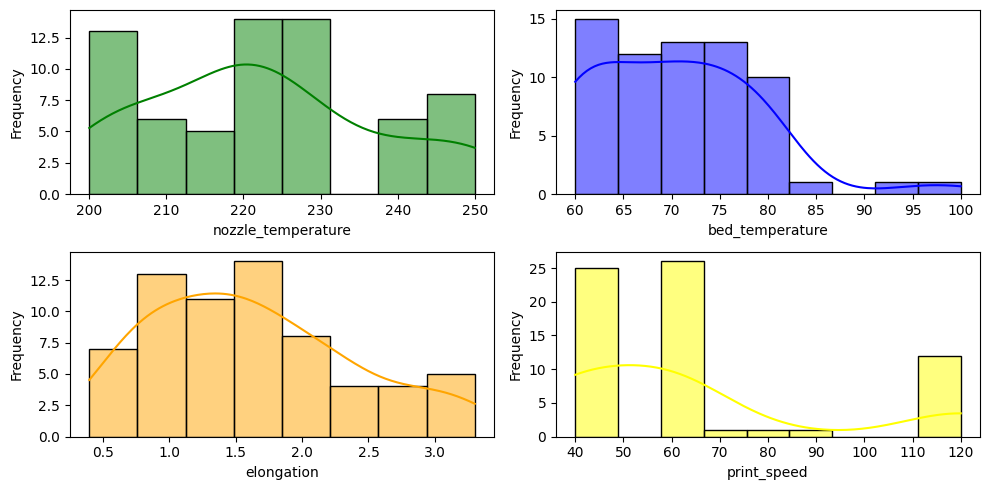

In [130]:

fig, ax = plt.subplots(2, 2, figsize=(10,5))
sns.histplot(DataFrame['nozzle_temperature'], ax=ax[0,0], kde=True, color="green", edgecolor="black")
ax[0,0].set_ylabel('Frequency')

sns.histplot(DataFrame['bed_temperature'], ax=ax[0,1], kde=True, color="blue", edgecolor="black")
ax[0,1].set_ylabel('Frequency')
# Add skewness text to plot
sns.histplot(DataFrame['elongation'], ax=ax[1,0], kde=True, color="orange", edgecolor="black")
ax[1,0].set_ylabel('Frequency')

sns.histplot(DataFrame['print_speed'], ax=ax[1,1], kde=True, color="yellow", edgecolor="black")
ax[1,1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()



### Distribution of Features:
##### 1. The histogram shows values mostly concentrated between 220–230°C with a few lower and higher values in nozzle temperature.
##### 2. Elongation Distribution peaks around 1–2%, with some higher values above 2.5%.
##### 3. bed temperature Values cluster around 65–75°C, with a long tail stretching toward 100°C.
##### 4. Histogram shows clusters at 40–60 mm/s, 60–70 mm/s, and a small group around 110–120 mm/s.

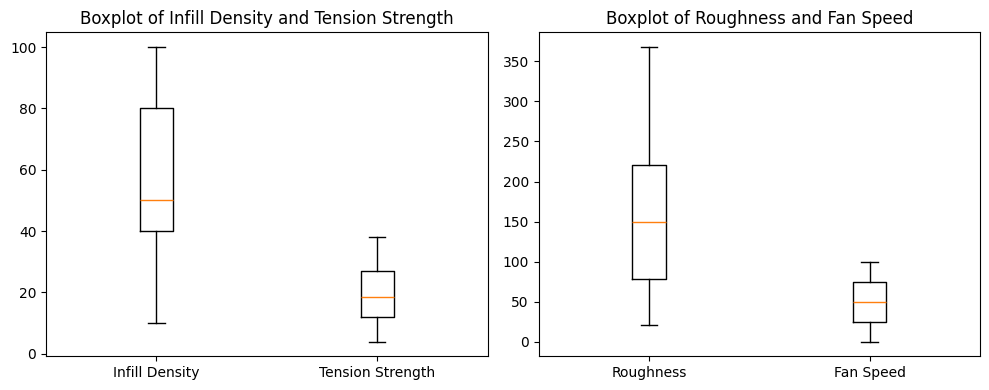

In [131]:


fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].boxplot([DataFrame['infill_density'], DataFrame['tension_strenght']], tick_labels=['Infill Density', 'Tension Strength'])
ax[0].set_title('Boxplot of Infill Density and Tension Strength')

ax[1].boxplot([DataFrame['roughness'], DataFrame['fan_speed']], tick_labels=['Roughness', 'Fan Speed'])
ax[1].set_title('Boxplot of Roughness and Fan Speed')

plt.tight_layout()
plt.show()



### Bivariate Analysis

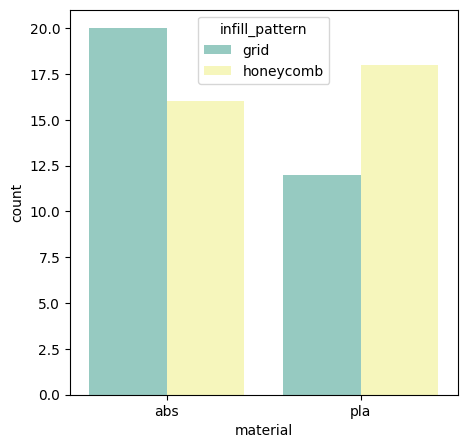

infill_pattern  grid  honeycomb
material                       
abs               20         16
pla               12         18


In [132]:
plt.figure(figsize=(5,5))
sns.countplot(data=DataFrame, x='material', hue='infill_pattern', palette='Set3')
plt.show()
#cross table for material and infill_pattern
cross_tab = pd.crosstab(DataFrame['material'], DataFrame['infill_pattern'])
print(cross_tab)


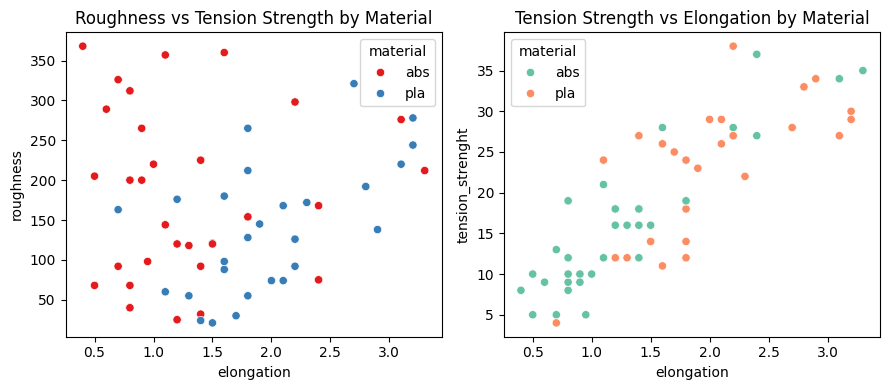

In [133]:
fix,axs = plt.subplots(1, 2, figsize=(9, 4))
sns.scatterplot(data=DataFrame, x='elongation', y='roughness', hue='material', ax=axs[0], palette='Set1')
axs[0].set_title('Roughness vs Tension Strength by Material')

sns.scatterplot(data=DataFrame,x='elongation', y='tension_strenght', hue='material', ax=axs[1], palette='Set2')
axs[1].set_title('Tension Strength vs Elongation by Material')
plt.tight_layout()
plt.show()

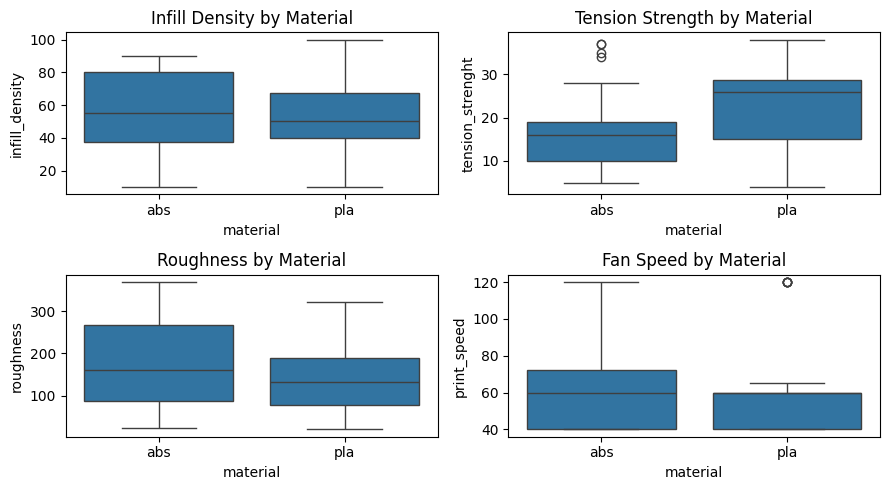

In [134]:

fig, axes = plt.subplots(2, 2, figsize=(9,5))
sns.boxplot(data=DataFrame, x='material', y='infill_density', ax=axes[0, 0])
axes[0, 0].set_title('Infill Density by Material')
sns.boxplot(data=DataFrame, x='material', y='tension_strenght', ax=axes[0, 1])
axes[0, 1].set_title('Tension Strength by Material')
sns.boxplot(data=DataFrame, x='material', y='roughness', ax=axes[1, 0])
axes[1, 0].set_title('Roughness by Material')
sns.boxplot(data=DataFrame, x='material', y='print_speed', ax=axes[1, 1])
axes[1, 1].set_title('Fan Speed by Material')
plt.tight_layout()
plt.show()


Number of outliers in each numerical column:
layer_height           0
wall_thickness         0
infill_density         0
nozzle_temperature     0
bed_temperature        2
print_speed           12
fan_speed              0
roughness              0
tension_strenght       0
elongation             0
dtype: int64


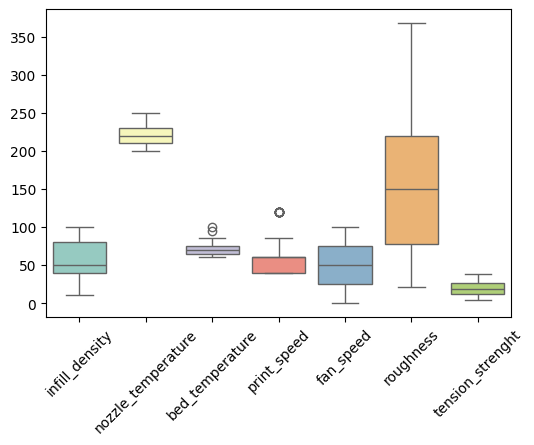

In [135]:
#checking outliers using IQR method for numerical columns
Q1 = DataFrame[numerical_cols].quantile(0.25)
Q3 = DataFrame[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((DataFrame[numerical_cols] < (Q1 - 1.5 * IQR)) | (DataFrame[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each numerical column:")
print(outliers)

plt.figure(figsize=(6,4))
cols_to_plot = [col for col in numerical_cols if col not in ['elongation','layer_height','wall_thickness','infill_pattern','material']]
sns.boxplot(data=DataFrame[cols_to_plot], palette='Set3')
plt.xticks(rotation=45)
plt.show()

    



##### 1. There are 2 outliers in bed temperature feature which can ignore.
##### 2. There are 12 outliers in print speed feature. which can be 18 % of data cannot be removed due to less data.

#### Multivariate analysis

In [136]:
DataFrame['material'] = DataFrame['material'].map({'abs':1,'pla':0})
DataFrame['infill_pattern'] = DataFrame['infill_pattern'].map({'honeycomb':1,'grid':0})

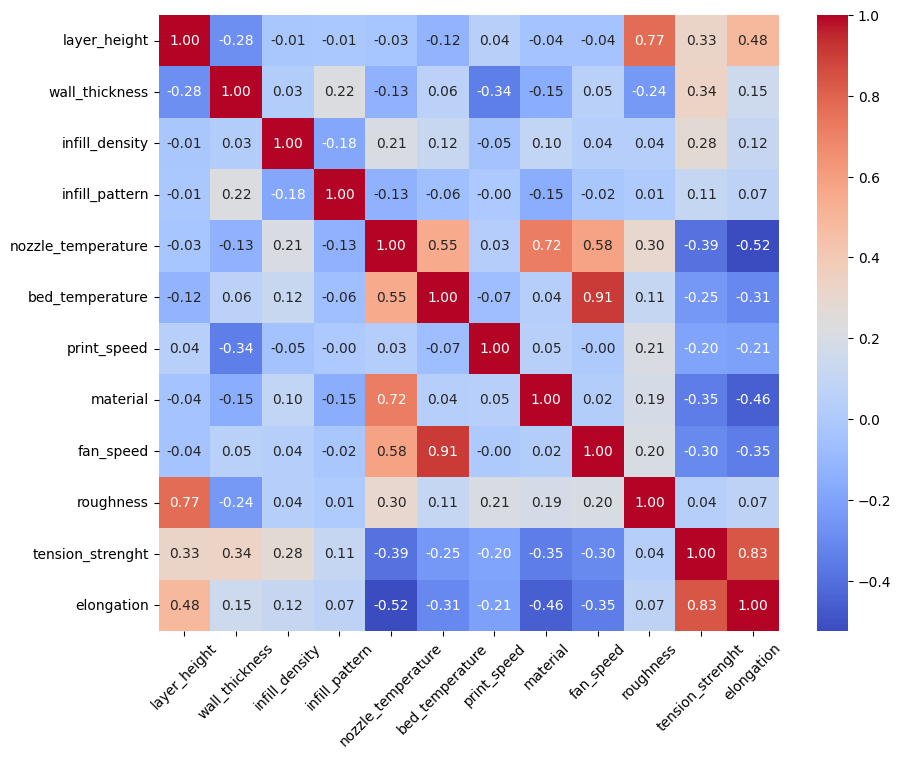

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(DataFrame.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

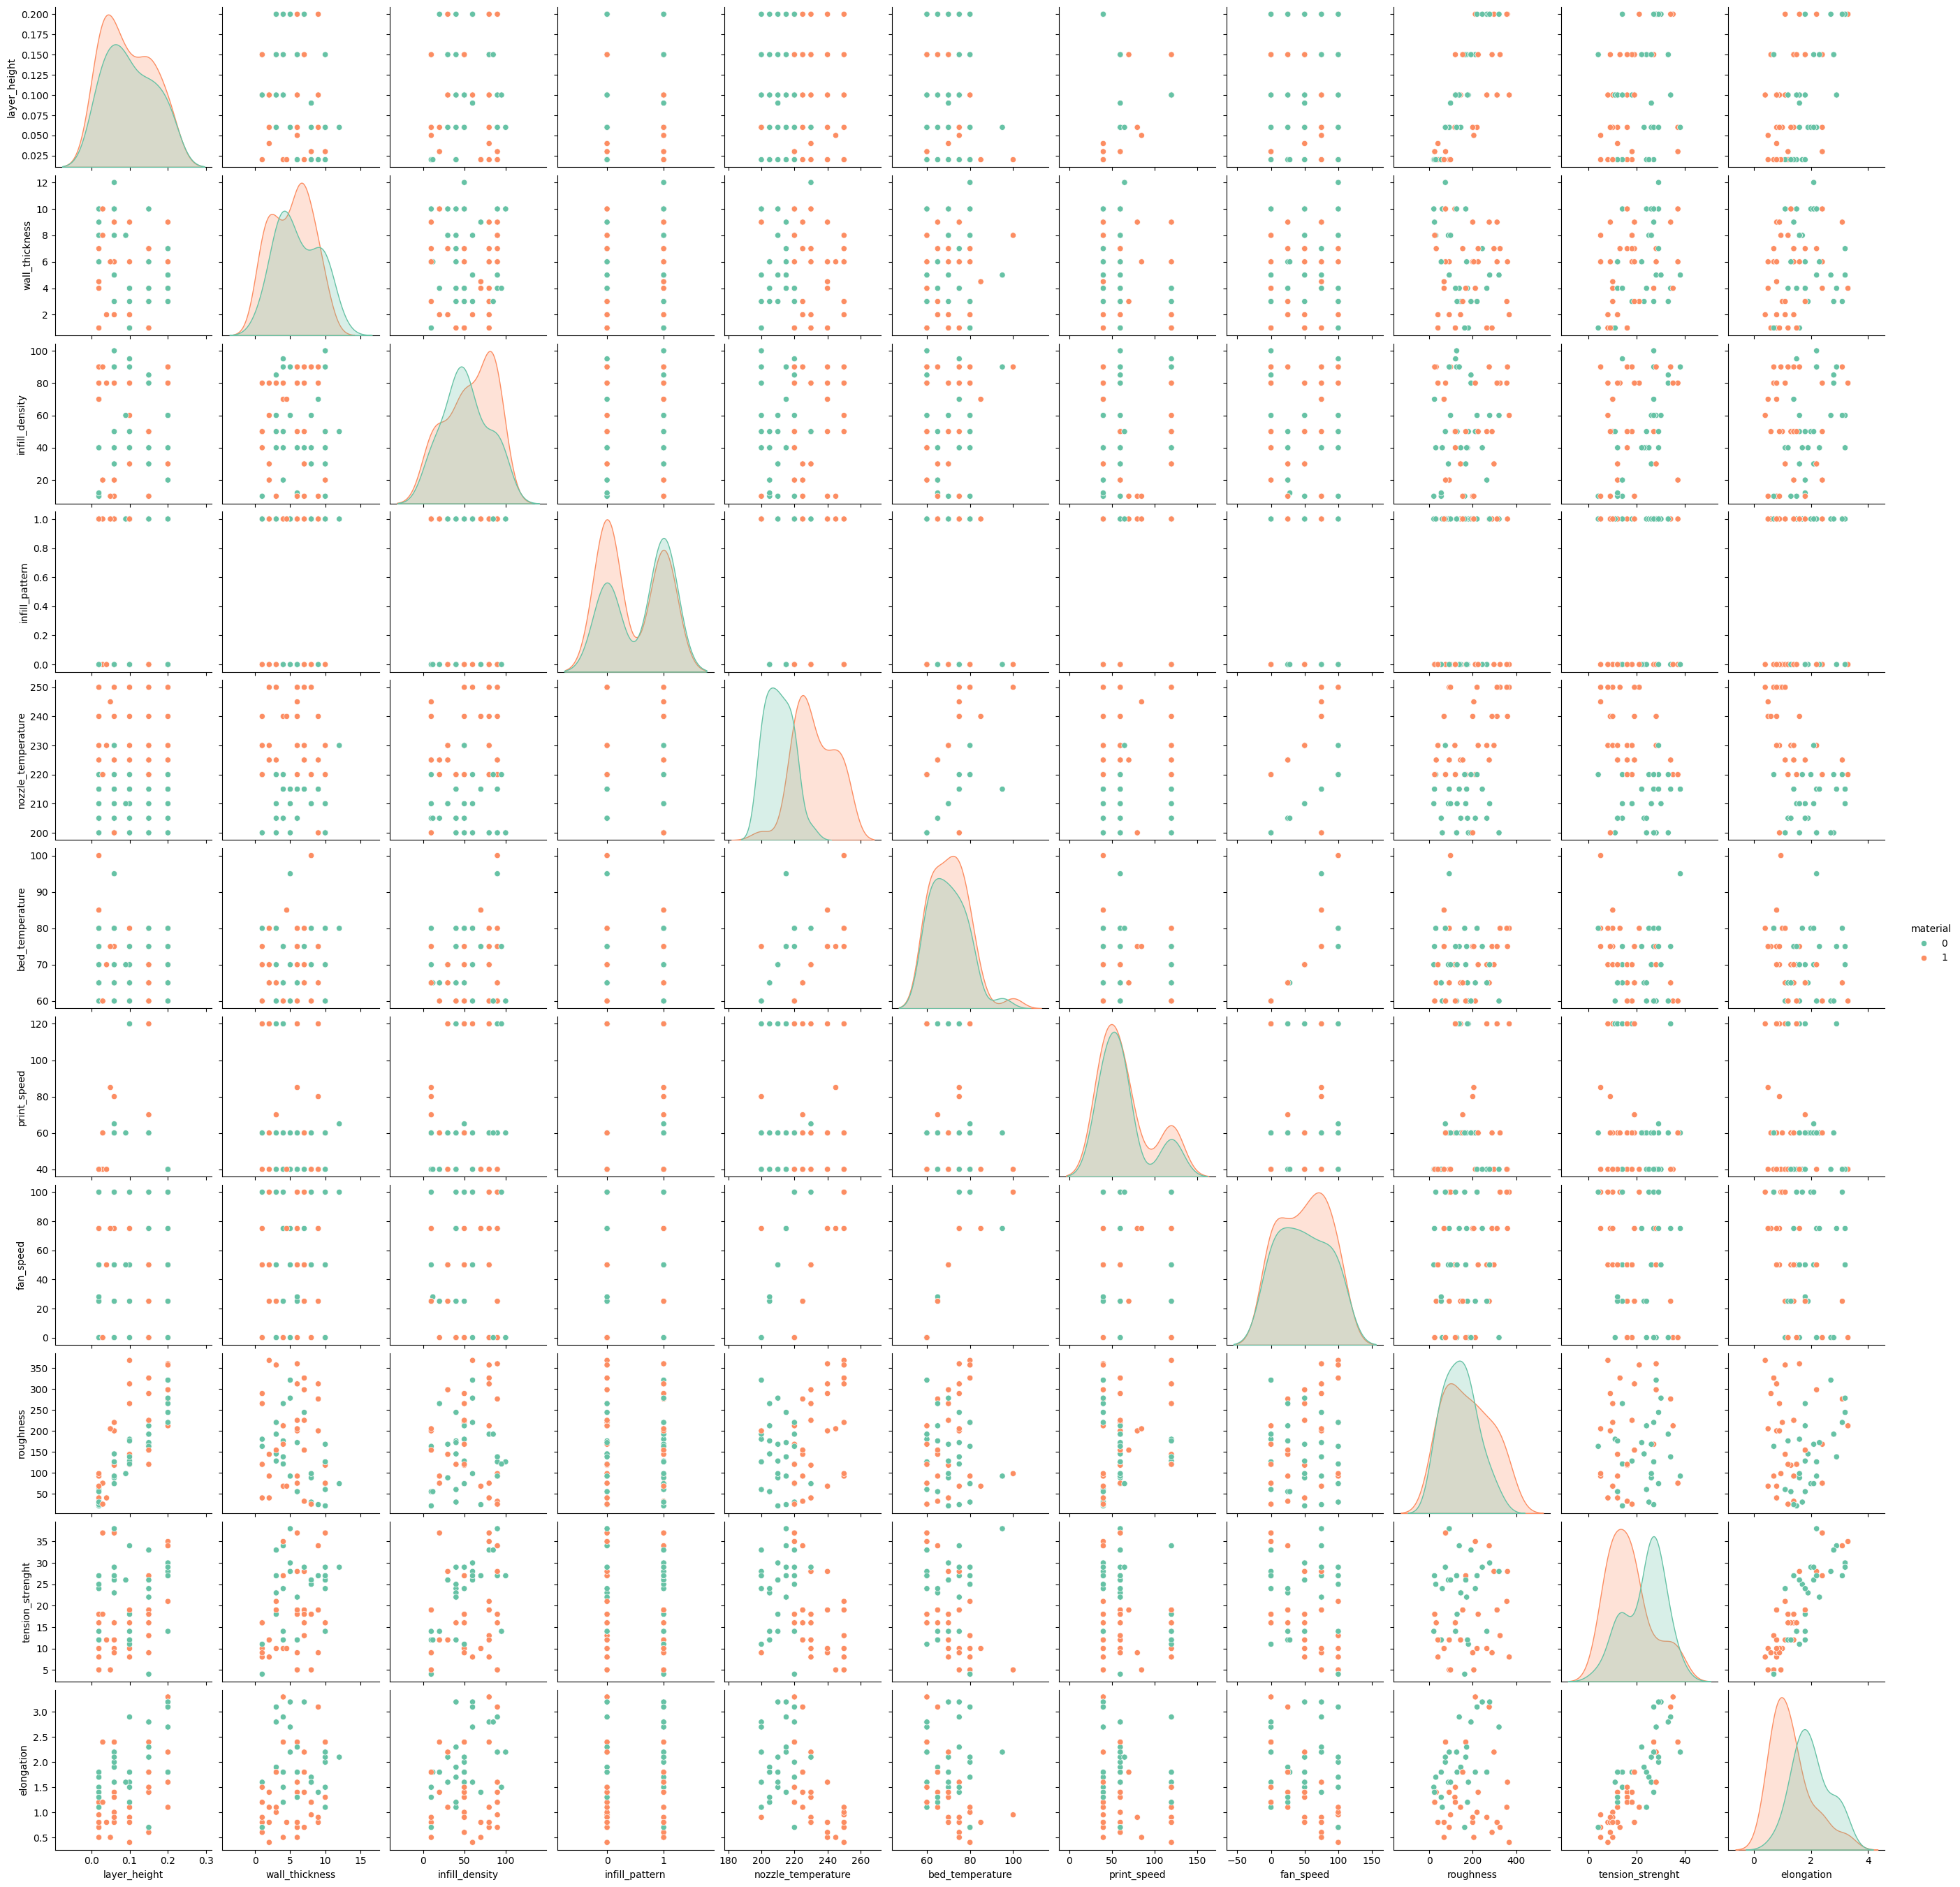

In [138]:
plt.figure(figsize=(10,8))
sns.pairplot(DataFrame, hue='material', palette='Set2')
plt.show()

## one-Hot Encoding

####  One-Hot encoding is used for categorical columns. Because both infill pattern and material categorical features are not ordinal categorical columns. Label encoding is used can for ordinal categorical columns.

In [139]:
DataFrame_encoded= pd.get_dummies(DataFrame, columns=categorical_cols, drop_first=True)

### Data splitting

In [140]:

x = DataFrame_encoded.drop(['material_1'], axis=1)
y = DataFrame_encoded['material_1']

##### Data is splitted from the DataFrame 'DataFrame_encoded' for two variables x(independent variable) and y(dependent variable).
##### Dependent variable is nothing but output in the dataset and independent variable is remaining all features

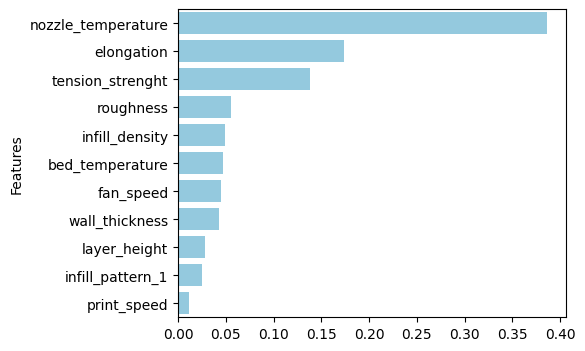

In [141]:
model = RandomForestClassifier()
model.fit(x, y)
imp = model.feature_importances_
title = x.columns
Top_features = pd.Series(imp,index=title).sort_values(ascending=False)

plt.figure(figsize=(5,4))
sns.barplot(x=Top_features.values, y=Top_features.index, color='skyblue')
plt.ylabel('Features')
plt.show()

In [142]:
## normalizing the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,infill_pattern_1
0,0.0,0.636364,0.888889,0.4,0.000,0.0,0.00,0.011527,0.411765,0.275862,0.0
1,0.0,0.545455,0.888889,0.5,0.125,0.0,0.25,0.031700,0.352941,0.344828,1.0
2,0.0,0.000000,0.777778,0.6,0.250,0.0,0.50,0.054755,0.117647,0.137931,0.0
3,0.0,0.272727,0.666667,0.8,0.375,0.0,0.75,0.135447,0.176471,0.034483,1.0
4,0.0,0.454545,0.888889,1.0,0.500,0.0,1.00,0.204611,0.029412,0.103448,0.0


In [143]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=42)

### Model Building

In [144]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#LOGISTIC REGRESSION


lg = LogisticRegression(max_iter=1000, random_state=42)
param_lg = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

random_lg = RandomizedSearchCV(lg, param_distributions=param_lg, n_iter=16,scoring='accuracy', cv=cv, n_jobs=-1, random_state=42)
random_lg.fit(x_train, y_train)
y_pred_lg= random_lg.predict(x_test)



C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=16. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [145]:

#RANDOM FOREST

rf = RandomForestClassifier(random_state=42)
param_rf = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [2,6,8,10],
    'min_samples_split': [2, 5,7],
    'min_samples_leaf': [1, 2,4,5],
    'max_features': ['sqrt', 'log2', None] 
}
random_rf = RandomizedSearchCV(rf, param_distributions=param_rf, n_iter=50,
                               scoring='accuracy', cv=cv, n_jobs=-1, random_state=42)
random_rf.fit(x_train, y_train)
y_pred_rf = random_rf.predict(x_test)


In [146]:
#DECISION TREE

dt = DecisionTreeClassifier(random_state=42)
param_dt = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4, 5]
}
random_dt = RandomizedSearchCV(dt, param_distributions=param_dt, n_iter=40,
                               scoring='accuracy', cv=cv, n_jobs=-1, random_state=42, verbose=1)
random_dt.fit(x_train, y_train)
y_pred_dt= random_lg.predict(x_test)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [147]:
def evaluate_model(name, search, x_train, y_train, x_test, y_test):
    best_model = search.best_estimator_
    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)
    
   
    cv_scores = cross_val_score(best_model, x_scaled, y, cv=cv, scoring='accuracy')
    
    print(f"\n================================={name} =======================================")
    print("Best Parameters: ",search.best_params_)
    print("CV Accuracy (best from RandomizedSearchCV):",search.best_score_)
    print("Mean CV Accuracy:",cv_scores.mean())
    print("CV Std Deviation:",cv_scores.std())
    print("Train Accuracy: ",accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:",accuracy_score(y_test, y_test_pred))
    print("Precision:",precision_score(y_test, y_test_pred))
    print("Recall: ",recall_score(y_test, y_test_pred))
    print("F1-Score:",f1_score(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    
    return accuracy_score(y_test, y_test_pred)


=================================Logistic Regression =======================================
Best Parameters:  {'solver': 'liblinear', 'C': 1}
CV Accuracy (best from RandomizedSearchCV): 0.7571428571428571
Mean CV Accuracy: 0.8791208791208792
CV Std Deviation: 0.036113575220120875
Train Accuracy:  0.8974358974358975
Test Accuracy: 0.8888888888888888
Precision: 0.9230769230769231
Recall:  0.8571428571428571
F1-Score: 0.8888888888888888


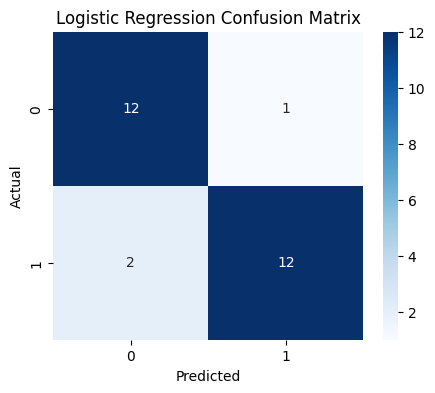


=================================Random Forest =======================================
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 6}
CV Accuracy (best from RandomizedSearchCV): 0.8142857142857143
Mean CV Accuracy: 0.9087912087912088
CV Std Deviation: 0.07562483751246264
Train Accuracy:  0.9230769230769231
Test Accuracy: 0.9259259259259259
Precision: 0.875
Recall:  1.0
F1-Score: 0.9333333333333333


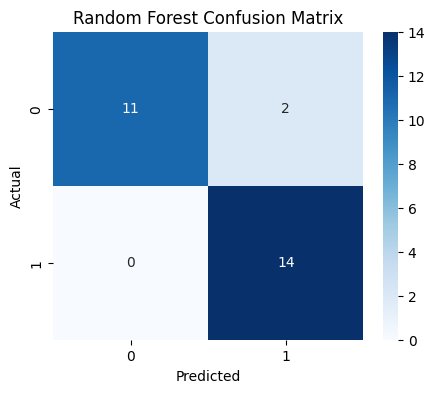


=================================Decision Tree =======================================
Best Parameters:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 2}
CV Accuracy (best from RandomizedSearchCV): 0.7142857142857142
Mean CV Accuracy: 0.8329670329670329
CV Std Deviation: 0.0583142820282268
Train Accuracy:  0.9487179487179487
Test Accuracy: 0.8148148148148148
Precision: 0.8
Recall:  0.8571428571428571
F1-Score: 0.8275862068965517


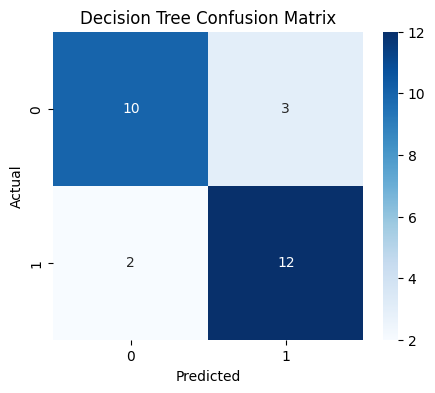

C:\Users\USER\AppData\Local\Temp\ipykernel_9188\949429407.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


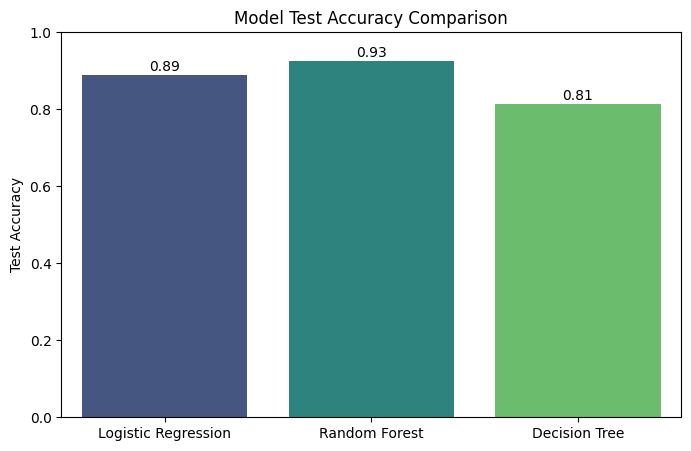

In [148]:
model_accuracies = {}
model_accuracies["Logistic Regression"] = evaluate_model("Logistic Regression", random_lg, x_train, y_train, x_test, y_test)
model_accuracies["Random Forest"] = evaluate_model("Random Forest", random_rf, x_train, y_train, x_test, y_test)
model_accuracies["Decision Tree"] = evaluate_model("Decision Tree", random_dt, x_train, y_train, x_test, y_test)

plt.figure(figsize=(8,5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
plt.title("Model Test Accuracy Comparison")
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

#### Case 1 – Good Fit:

###### Train accuracy and Test accuracy are both high and similar values.

###### CV mean and Train/Test accuracy, CV standard deviation is low <=1, then  model generalizes well.

#### Case 2 – Overfitting:

###### Train accuracy and  Test accuracy are both high and similar values.

###### CV mean much lower than train accuracy, CV  standard deviation is high >=1 or low <=1 model memorizes data, unstable.

#### Case 3 – Underfitting:

###### Train and Test accuracy both low.

###### CV mean and Train/Test accuracy are too low,  CV  standard deviation is high >=1 or low <=1 model too simple, cannot learn patterns.

### From above Bar graph RandomForestClassifier have more accuracy and metrics of Random Forest are stable model with Test and Train accuracy are similar along with mean CV accuracy and Standard deviation is < 0.1 .

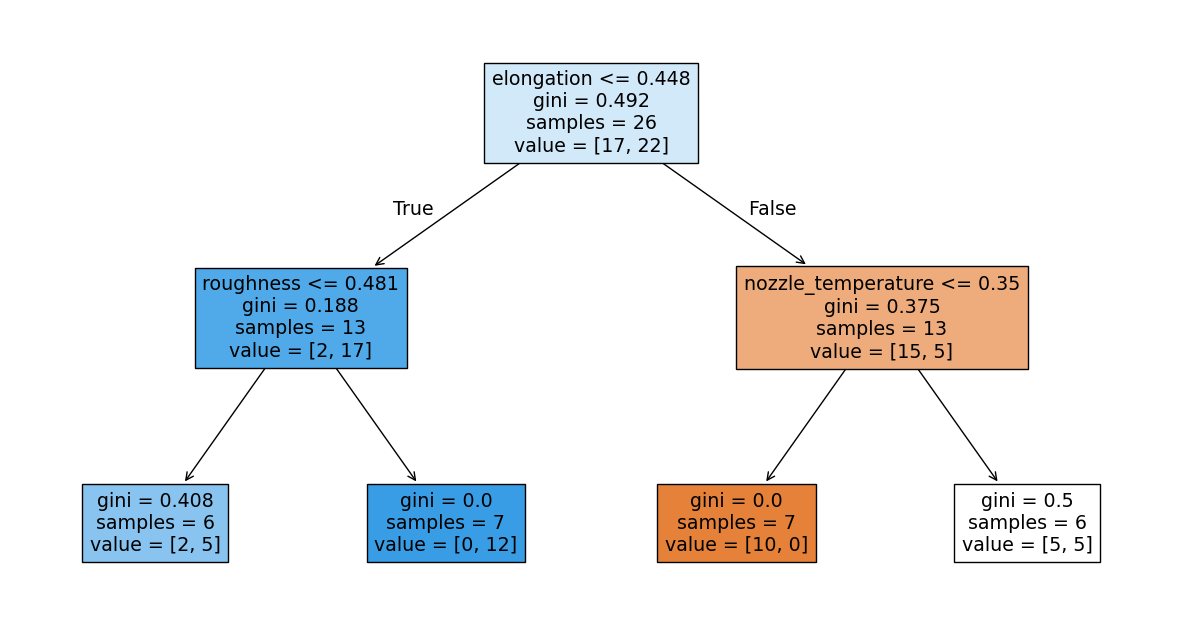

In [149]:
from sklearn.tree import plot_tree

best_rf = random_rf.best_estimator_

# Plot the first tree
plt.figure(figsize=(15,8))
plot_tree(best_rf.estimators_[0], feature_names=DataFrame_encoded.columns, filled=True)
plt.show()

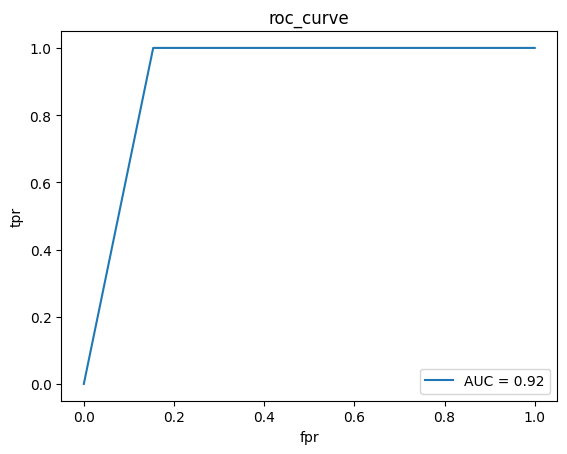

In [150]:
import sklearn.metrics as metrics


fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)

roc_auc_DT = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc_DT)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc_curve")
plt.legend()

In [151]:
import joblib
joblib.dump(random_rf,'3d_print.pkl')

['3d_print.pkl']